# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
# Define your OpenWeatherMap API key
api_key = weather_api_key
url = "https://api.openweathermap.org/data/2.5/weather"
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | ponta delgada
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | buka
Processing Record 5 of Set 1 | northam
Processing Record 6 of Set 1 | fale old settlement
Processing Record 7 of Set 1 | toliara
Processing Record 8 of Set 1 | kyzylorda
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | olinda
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | rongelap
Processing Record 14 of Set 1 | urangan
Processing Record 15 of Set 1 | igarka
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | kombissiri
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | san antonio de pale
Processing Record 22 of Set 1 | papatowai
Processing R

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.5649,-52.7093,5.08,84,100,6.69,CA,1712966759
1,ponta delgada,37.7333,-25.6667,18.44,88,40,3.60,PT,1712966759
2,tiksi,71.6872,128.8694,-18.01,86,98,9.56,RU,1712966760
3,buka,40.8108,69.1986,15.99,78,100,1.85,UZ,1712966760
4,northam,51.0333,-4.2167,10.90,94,100,3.31,GB,1712966760


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv('../output_data/cities.csv', index_label='City_ID')

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,5.08,84,100,6.69,CA,1712966759
1,ponta delgada,37.7333,-25.6667,18.44,88,40,3.60,PT,1712966759
2,tiksi,71.6872,128.8694,-18.01,86,98,9.56,RU,1712966760
3,buka,40.8108,69.1986,15.99,78,100,1.85,UZ,1712966760
4,northam,51.0333,-4.2167,10.90,94,100,3.31,GB,1712966760


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

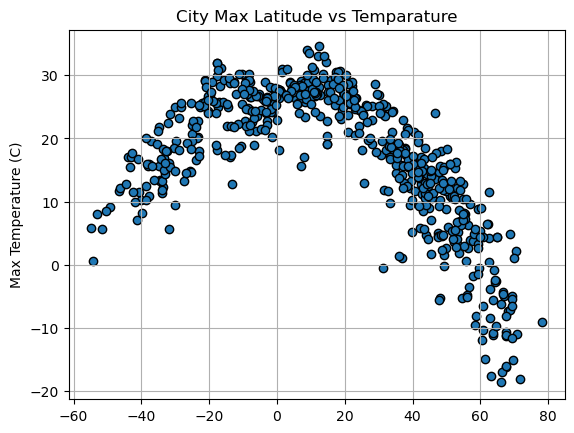

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolors= "black")
# Incorporate the other graph properties
plt.title("City Max Latitude vs Temparature") 
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

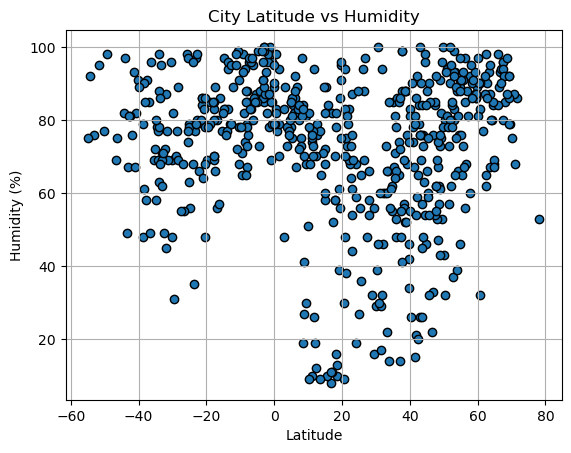

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity") 
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

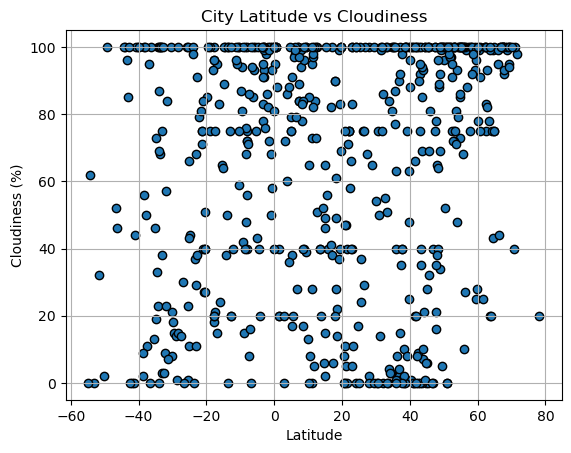

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness") 
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

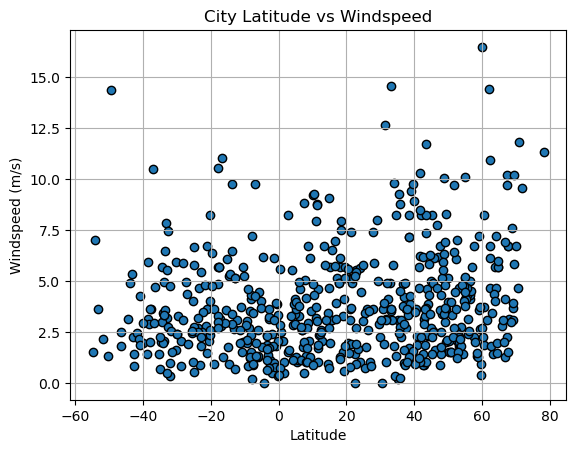

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Windspeed") 
plt.ylabel("Windspeed (m/s)")
plt.xlabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
    regress_values = x * slope + intercept
    return regress_values, slope, intercept, rvalue, pvalue, stderr

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,5.08,84,100,6.69,CA,1712966759
1,ponta delgada,37.7333,-25.6667,18.44,88,40,3.60,PT,1712966759
2,tiksi,71.6872,128.8694,-18.01,86,98,9.56,RU,1712966760
3,buka,40.8108,69.1986,15.99,78,100,1.85,UZ,1712966760
4,northam,51.0333,-4.2167,10.90,94,100,3.31,GB,1712966760


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,fale old settlement,-9.3852,-171.2468,29.91,71,94,3.05,TK,1712966761
6,toliara,-23.3500,43.6667,20.17,77,37,4.65,MG,1712966761
9,olinda,-8.0089,-34.8553,28.85,79,40,4.12,BR,1712966762
10,grytviken,-54.2811,-36.5092,0.66,92,62,7.02,GS,1712966762
13,urangan,-25.3000,152.9000,25.67,74,1,4.02,AU,1712966763


###  Temperature vs. Latitude Linear Regression Plot

R-value: -0.8823964586073315


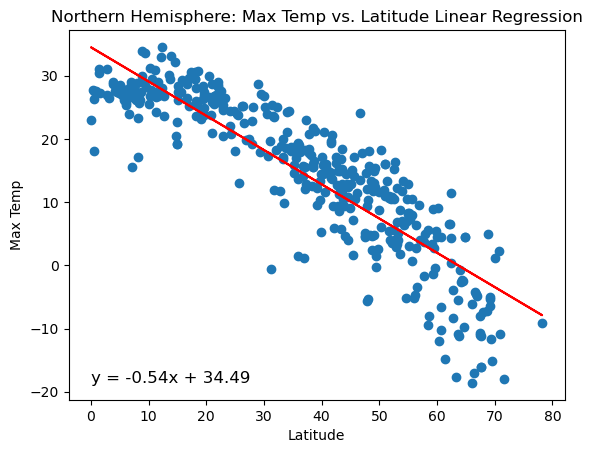

In [16]:
# Linear regression on Northern Hemisphere
def linear_regression(x, y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept
    return regress_values, slope, intercept, rvalue, pvalue, stderr
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Perform linear regression
(regress_values, slope, intercept, rvalue, pvalue, std_err) = linear_regression(x=x_values, y=y_values)
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.text(x_values.min(), y_values.min(), regression_line, color='black', fontsize=12)
# Print the R-value
print(f"R-value: {rvalue}")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere: Max Temp vs. Latitude Linear Regression')
plt.show()


R-value (Southern Hemisphere): 0.7581562555384556


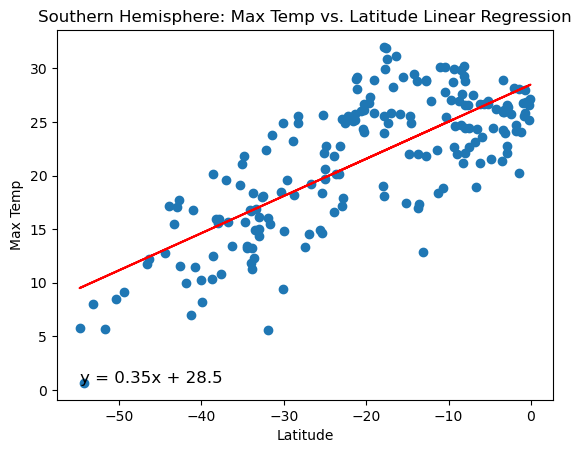

In [17]:
# Linear regression on Southern Hemisphere
outhern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Get x and y values for the Southern Hemisphere analysis
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

# Perform linear regression for the Southern Hemisphere
regress_values_southern, slope_southern, intercept_southern, rvalue_southern, pvalue_southern, std_err_southern = linear_regression(x=x_values_southern, y=y_values_southern)

# Create the regression line equation for the Southern Hemisphere
regression_line_southern = f"y = {round(slope_southern, 2)}x + {round(intercept_southern, 2)}"

# Print the R-value for the Southern Hemisphere
print(f"R-value (Southern Hemisphere): {rvalue_southern}")

# Plot the scatter plot and regression line for the Southern Hemisphere
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, color='red')
# Add the regression equation to the plot for the Southern Hemisphere
plt.text(x_values_southern.min(), y_values_southern.min(), regression_line_southern, color='black', fontsize=12)

# Set plot labels and title for the Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere: Max Temp vs. Latitude Linear Regression')
# Show the plot for the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** We can see that the equatorial region seems to be warmer since they receive the direct sun light whereas the poles seem to be colder since they are further away from the sun.  

### Humidity vs. Latitude Linear Regression Plot

R-value (Northern Hemisphere - Humidity vs. Latitude): 0.21509747666775325


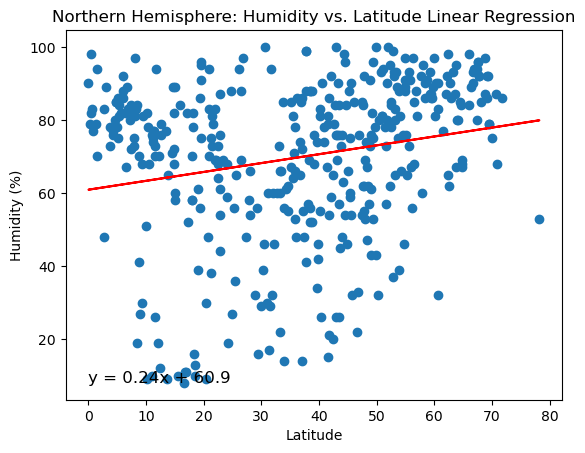

In [18]:
# Northern Hemisphere
x_values_northern_humidity = northern_hemi_df["Lat"]
y_values_northern_humidity = northern_hemi_df["Humidity"]

# Perform linear regression for Humidity vs. Latitude in the Northern Hemisphere
regress_values_northern_humidity, slope_northern_humidity, intercept_northern_humidity, rvalue_northern_humidity, pvalue_northern_humidity, std_err_northern_humidity = linear_regression(x=x_values_northern_humidity, y=y_values_northern_humidity)

# Create the regression line equation for Humidity vs. Latitude in the Northern Hemisphere
regression_line_northern_humidity = f"y = {round(slope_northern_humidity, 2)}x + {round(intercept_northern_humidity, 2)}"

# Print the R-value for Humidity vs. Latitude in the Northern Hemisphere
print(f"R-value (Northern Hemisphere - Humidity vs. Latitude): {rvalue_northern_humidity}")

# Plot the scatter plot and regression line for Humidity vs. Latitude in the Northern Hemisphere
plt.scatter(x_values_northern_humidity, y_values_northern_humidity)
plt.plot(x_values_northern_humidity, regress_values_northern_humidity, color='red')

# Add the regression equation to the plot for Humidity vs. Latitude in the Northern Hemisphere
plt.text(x_values_northern_humidity.min(), y_values_northern_humidity.min(), regression_line_northern_humidity, color='black', fontsize=12)

# Set plot labels and title for Humidity vs. Latitude in the Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression')

# Show the plot for Humidity vs. Latitude in the Northern Hemisphere
plt.show()

R-value (Southern Hemisphere - Humidity vs. Latitude): 0.3127023319995582


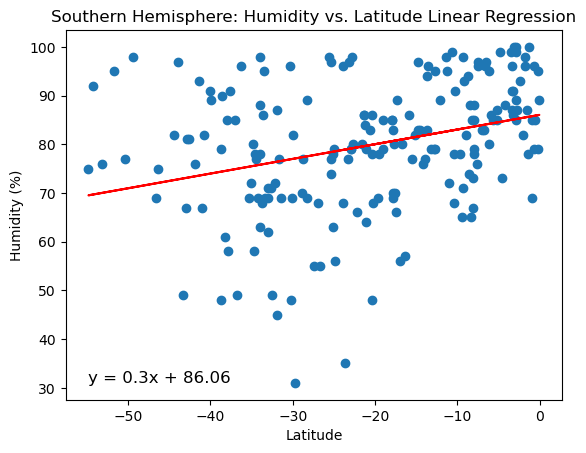

In [19]:
# Southern Hemisphere
x_values_southern_humidity = southern_hemi_df["Lat"]
y_values_southern_humidity = southern_hemi_df["Humidity"]

# Perform linear regression for Humidity vs. Latitude in the Southern Hemisphere
regress_values_southern_humidity, slope_southern_humidity, intercept_southern_humidity, rvalue_southern_humidity, pvalue_southern_humidity, std_err_southern_humidity = linear_regression(x=x_values_southern_humidity, y=y_values_southern_humidity)

# Create the regression line equation for Humidity vs. Latitude in the Southern Hemisphere
regression_line_southern_humidity = f"y = {round(slope_southern_humidity, 2)}x + {round(intercept_southern_humidity, 2)}"

# Print the R-value for Humidity vs. Latitude in the Southern Hemisphere
print(f"R-value (Southern Hemisphere - Humidity vs. Latitude): {rvalue_southern_humidity}")

# Plot the scatter plot and regression line for Humidity vs. Latitude in the Southern Hemisphere
plt.scatter(x_values_southern_humidity, y_values_southern_humidity)
plt.plot(x_values_southern_humidity, regress_values_southern_humidity, color='red')

# Add the regression equation to the plot for Humidity vs. Latitude in the Southern Hemisphere
plt.text(x_values_southern_humidity.min(), y_values_southern_humidity.min(), regression_line_southern_humidity, color='black', fontsize=12)

# Set plot labels and title for Humidity vs. Latitude in the Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression')

# Show the plot for Humidity vs. Latitude in the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** There seems to be no direct or distint correlation between the latitude and humidty.

### Cloudiness vs. Latitude Linear Regression Plot

R-value (Northern Hemisphere - Cloudiness vs. Latitude): 0.19744475684063353


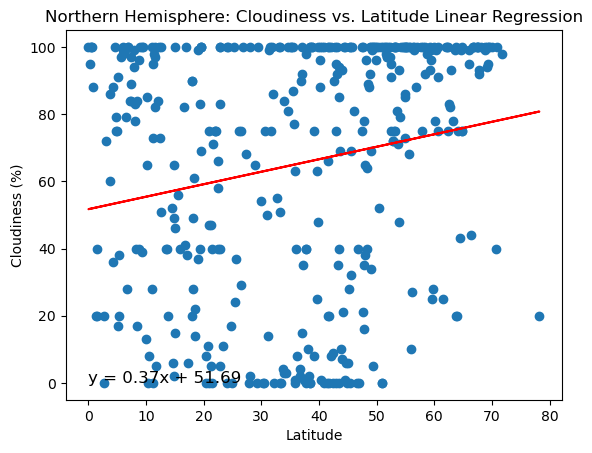

In [20]:
# Northern Hemisphere
x_values_northern_cloudiness = northern_hemi_df["Lat"]
y_values_northern_cloudiness = northern_hemi_df["Cloudiness"]

# Perform linear regression for Cloudiness vs. Latitude in the Northern Hemisphere
regress_values_northern_cloudiness, slope_northern_cloudiness, intercept_northern_cloudiness, rvalue_northern_cloudiness, pvalue_northern_cloudiness, std_err_northern_cloudiness = linear_regression(x=x_values_northern_cloudiness, y=y_values_northern_cloudiness)

# Create the regression line equation for Cloudiness vs. Latitude in the Northern Hemisphere
regression_line_northern_cloudiness = f"y = {round(slope_northern_cloudiness, 2)}x + {round(intercept_northern_cloudiness, 2)}"

# Print the R-value for Cloudiness vs. Latitude in the Northern Hemisphere
print(f"R-value (Northern Hemisphere - Cloudiness vs. Latitude): {rvalue_northern_cloudiness}")

# Plot the scatter plot and regression line for Cloudiness vs. Latitude in the Northern Hemisphere
plt.scatter(x_values_northern_cloudiness, y_values_northern_cloudiness)
plt.plot(x_values_northern_cloudiness, regress_values_northern_cloudiness, color='red')

# Add the regression equation to the plot for Cloudiness vs. Latitude in the Northern Hemisphere
plt.text(x_values_northern_cloudiness.min(), y_values_northern_cloudiness.min(), regression_line_northern_cloudiness, color='black', fontsize=12)

# Set plot labels and title for Cloudiness vs. Latitude in the Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression')

# Show the plot for Cloudiness vs. Latitude in the Northern Hemisphere
plt.show()

R-value (Southern Hemisphere - Cloudiness vs. Latitude): 0.2975231617174503


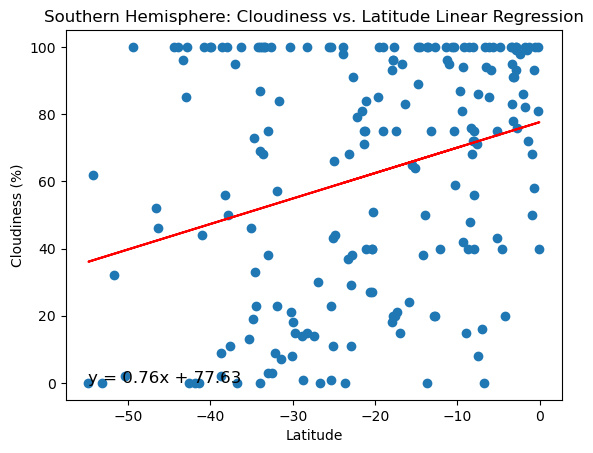

In [21]:
# Southern Hemisphere
x_values_southern_cloudiness = southern_hemi_df["Lat"]
y_values_southern_cloudiness = southern_hemi_df["Cloudiness"]

# Perform linear regression for Cloudiness vs. Latitude in the Southern Hemisphere
regress_values_southern_cloudiness, slope_southern_cloudiness, intercept_southern_cloudiness, rvalue_southern_cloudiness, pvalue_southern_cloudiness, std_err_southern_cloudiness = linear_regression(x=x_values_southern_cloudiness, y=y_values_southern_cloudiness)

# Create the regression line equation for Cloudiness vs. Latitude in the Southern Hemisphere
regression_line_southern_cloudiness = f"y = {round(slope_southern_cloudiness, 2)}x + {round(intercept_southern_cloudiness, 2)}"

# Print the R-value for Cloudiness vs. Latitude in the Southern Hemisphere
print(f"R-value (Southern Hemisphere - Cloudiness vs. Latitude): {rvalue_southern_cloudiness}")

# Plot the scatter plot and regression line for Cloudiness vs. Latitude in the Southern Hemisphere
plt.scatter(x_values_southern_cloudiness, y_values_southern_cloudiness)
plt.plot(x_values_southern_cloudiness, regress_values_southern_cloudiness, color='red')

# Add the regression equation to the plot for Cloudiness vs. Latitude in the Southern Hemisphere
plt.text(x_values_southern_cloudiness.min(), y_values_southern_cloudiness.min(), regression_line_southern_cloudiness, color='black', fontsize=12)
# Set plot labels and title for Cloudiness vs. Latitude in the Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression')

# Show the plot for Cloudiness vs. Latitude in the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** Similar to humidity, cloudiness also does not have a direct correlation with latitude as it is scattering all over. Cloudiness may have been influenced by different factors.

### Wind Speed vs. Latitude Linear Regression Plot

R-value (Northern Hemisphere - Wind Speed vs. Latitude): 0.16953028761388964


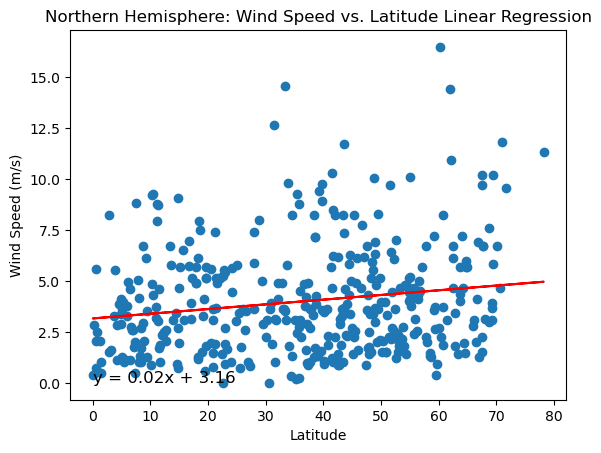

In [22]:
# Northern Hemisphere
x_values_northern_wind = northern_hemi_df["Lat"]
y_values_northern_wind = northern_hemi_df["Wind Speed"]

# Perform linear regression for Wind Speed vs. Latitude in the Northern Hemisphere
regress_values_northern_wind, slope_northern_wind, intercept_northern_wind, rvalue_northern_wind, pvalue_northern_wind, std_err_northern_wind = linear_regression(x=x_values_northern_wind, y=y_values_northern_wind)

# Create the regression line equation for Wind Speed vs. Latitude in the Northern Hemisphere
regression_line_northern_wind = f"y = {round(slope_northern_wind, 2)}x + {round(intercept_northern_wind, 2)}"

# Print the R-value for Wind Speed vs. Latitude in the Northern Hemisphere
print(f"R-value (Northern Hemisphere - Wind Speed vs. Latitude): {rvalue_northern_wind}")
# Plot the scatter plot and regression line for Wind Speed vs. Latitude in the Northern Hemisphere
plt.scatter(x_values_northern_wind, y_values_northern_wind)
plt.plot(x_values_northern_wind, regress_values_northern_wind, color='red')
# Add the regression equation to the plot for Wind Speed vs. Latitude in the Northern Hemisphere
plt.text(x_values_northern_wind.min(), y_values_northern_wind.min(), regression_line_northern_wind, color='black', fontsize=12)
# Set plot labels and title for Wind Speed vs. Latitude in the Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression')
# Show the plot for Wind Speed vs. Latitude in the Northern Hemisphere
plt.show()

R-value (Southern Hemisphere - Wind Speed vs. Latitude): -0.13534621418456902


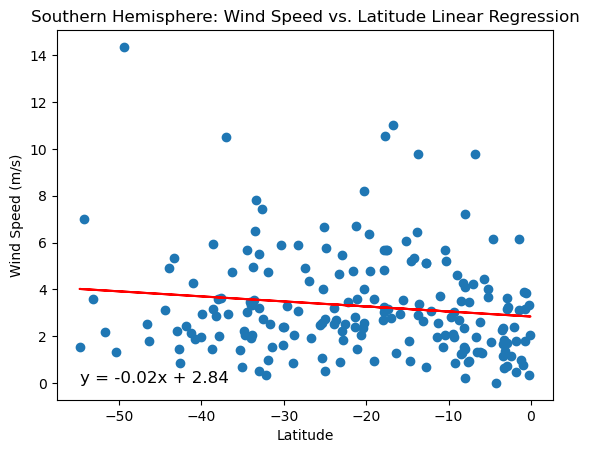

In [23]:
# Southern Hemisphere
x_values_southern_wind = southern_hemi_df["Lat"]
y_values_southern_wind = southern_hemi_df["Wind Speed"]

# Perform linear regression for Wind Speed vs. Latitude in the Southern Hemisphere
regress_values_southern_wind, slope_southern_wind, intercept_southern_wind, rvalue_southern_wind, pvalue_southern_wind, std_err_southern_wind = linear_regression(x=x_values_southern_wind, y=y_values_southern_wind)

# Create the regression line equation for Wind Speed vs. Latitude in the Southern Hemisphere
regression_line_southern_wind = f"y = {round(slope_southern_wind, 2)}x + {round(intercept_southern_wind, 2)}"

# Print the R-value for Wind Speed vs. Latitude in the Southern Hemisphere
print(f"R-value (Southern Hemisphere - Wind Speed vs. Latitude): {rvalue_southern_wind}")

# Plot the scatter plot and regression line for Wind Speed vs. Latitude in the Southern Hemisphere
plt.scatter(x_values_southern_wind, y_values_southern_wind)
plt.plot(x_values_southern_wind, regress_values_southern_wind, color='red')

# Add the regression equation to the plot for Wind Speed vs. Latitude in the Southern Hemisphere
plt.text(x_values_southern_wind.min(), y_values_southern_wind.min(), regression_line_southern_wind, color='black', fontsize=12)
# Set plot labels and title for Wind Speed vs. Latitude in the Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude Linear Regression')

# Show the plot for Wind Speed vs. Latitude in the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** Similar to above conclusions, wind patterns do not seem to have any dinstict correlation with latitude although nortern hemisphere has stronger wind speed than the southern hemisphere. 